# Escuela Politécnica Nacional
**Nombres:** WELLINGTON BARROS, MATEO CORONADO, JOSUE MANTUANO,JONATHAN PAREDES, LIAM  ZUÑIGA 

**Fecha:** 07/08/2025

**Materia:** INTELIGENCIA ARTIFICIAL

# Adivina la Emoción
**Proyecto de visión por computadora + aprendizaje supervisado**

**Grupo:5**  

## 1. Introducción

En este proyecto desarrollamos un sistema interactivo que reconoce emociones faciales en tiempo real usando visión por computadora.  
El sistema fue diseñado para ser parte de una experiencia lúdica en la Casa Abierta, donde los visitantes pueden interactuar con un modelo de IA y desafiar su capacidad de reconocimiento emocional.

Para alcanzar este objetivo, se empleará un modelo de red neuronal convolucional (CNN) entrenado con el dataset FER2013, un conjunto de datos ampliamente utilizado para el análisis de emociones faciales. Este modelo será capaz de identificar siete emociones clave: felicidad, tristeza, enojo, sorpresa, neutralidad, miedo y disgusto. 

**Emociones reconocidas:**

- 😡 Enojado
- 🤢 Disgusto
- 😱 Miedo
- 😄 Feliz
- 😐 Neutral
- 😢 Triste
- 😲 Sorprendido

## 2. Objetivos

- Desarrollar un modelo de red neuronal convolucional (CNN) capaz de reconocer emociones faciales desde una webcam.
- Integrar el modelo con una interfaz amigable usando Streamlit.
- Diseñar una experiencia gamificada para el público, donde intenten "engañar" a la IA.

## 3. Tecnologías y Herramientas

- **Python**
- **TensorFlow/Keras** – para el entrenamiento del modelo CNN.
- **OpenCV** – para la captura de imágenes desde la webcam y detección de rostros.
- **FER2013** – Dataset de emociones faciales disponible en Kaggle.

## 4. Arquitectura del Sistema

1. **Captura de imagen** desde webcam (OpenCV)
2. **Detección de rostro**
3. **Preprocesamiento** de la imagen (escala de grises, tamaño 48x48)
4. **Predicción** usando el modelo CNN entrenado
5. **Visualización** en la interfaz (emoji + emoción)

## 5. ¿Qué hace nuestro sistema?
Nuestro sistema permite reconocer emociones humanas en tiempo real utilizando tecnología de visión por computadora y aprendizaje profundo.
- Usa webcam:
 Captura imágenes del rostro del usuario en vivo usando una cámara web estándar.
- Detecta rostro con OpenCV:
 Utiliza OpenCV para localizar y recortar la región del rostro en la imagen.
- Clasifica emociones con una CNN entrenada con FER2013:
 Una Red Neuronal Convolucional (CNN) analiza la imagen facial para predecir una de las 7 emociones:

## 6.¿Qué es una CNN?
Una CNN es una arquitectura de red neuronal especializada en procesar datos con estructura de grilla, como las imágenes. Aprende automáticamente características visuales (bordes, formas, patrones) sin intervención humana.
### Componentes clave:
- Conv2D: detecta patrones visuales.
- MaxPooling2D: reduce la dimensión espacial.
- Dropout: previene sobreajuste.
- BatchNormalization: estabiliza el entrenamiento.
- Dense + Softmax: toma decisiones y clasifica



## 7. Instalamos librerías necesarias

In [ ]:
# Ejecuta el siguiente comando en la terminal del entorno actual (por ejemplo, en Jupyter Notebook o Google Colab)
!pip install --upgrade --quiet datasets fsspec huggingface_hub

# pip install                → Comando para instalar paquetes de Python.
# --upgrade                  → Asegura que se instalen las versiones más recientes de los paquetes indicados.
# --quiet                    → Reduce la cantidad de mensajes mostrados durante la instalación.
# datasets                   → Biblioteca de Hugging Face para cargar y manejar datasets de NLP y ML.
# fsspec                     → Proporciona una interfaz abstracta para sistemas de archivos (locales y en la nube).
# huggingface_hub            → Cliente para interactuar con el Hugging Face Hub (modelos, datasets, etc.).


In [ ]:
!pip install scipy
# Instala la biblioteca 'scipy' en el entorno actual.
# 'scipy' es una biblioteca de Python para computación científica.
# Incluye módulos para álgebra lineal, optimización, integración, procesamiento de señales, estadísticas, etc.


## 8. Se carga e importa las funciones a utilizar 

In [ ]:
from datasets import load_dataset
# Importa la función 'load_dataset' de la librería Hugging Face 'datasets' para cargar conjuntos de datos predefinidos o personalizados.

import numpy as np
# Importa NumPy, una biblioteca fundamental para operaciones matemáticas y manejo eficiente de arreglos multidimensionales.

from tensorflow.keras.utils import to_categorical
# Importa 'to_categorical', una función de Keras que convierte etiquetas enteras en codificación one-hot (útil para clasificación).

from PIL import Image
# Importa la clase 'Image' de la biblioteca Pillow para cargar, manipular y convertir imágenes en Python.

import io
# Importa el módulo 'io' para manejar flujos de datos en memoria como si fueran archivos (por ejemplo, para leer imágenes desde bytes).

import scipy
# Importa la biblioteca SciPy, que contiene funciones matemáticas avanzadas y herramientas científicas (aunque aquí aún no se usa directamente).


c:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Entrenamos un modelo con ejemplos donde cada imagen tiene una etiqueta de emoción (feliz, triste, etc.).
X_train, y_train: Datos e imágenes etiquetadas
El modelo aprende patrones a partir de estos datos
Se usa categorical_crossentropy como función de pérdida para clasificación multiclase

In [ ]:
ds = load_dataset("Jeneral/fer-2013")
# Carga el dataset llamado "fer-2013" desde el repositorio de Hugging Face, subido por el usuario 'Jeneral'.
# Este conjunto de datos contiene imágenes de rostros humanos etiquetadas con emociones (útil para clasificación de emociones).
# El resultado es un objeto tipo DatasetDict con divisiones como 'train', 'test', etc.

print(ds)
# Imprime una descripción general del dataset cargado.
# Mostrará las particiones disponibles (por ejemplo: train/test), el número de ejemplos y las características de cada uno (por ejemplo: image, label).


DatasetDict({
    train: Dataset({
        features: ['img_bytes', 'labels'],
        num_rows: 28709
    })
    test: Dataset({
        features: ['img_bytes', 'labels'],
        num_rows: 7178
    })
})


## 9. Visión por Computadora
Se trabaja con imágenes faciales que deben ser procesadas y entendidas por el modelo.

Preprocesamiento de imágenes:
- Redimensionado a 48x48 píxeles
- Conversión a escala de grises (img.convert("L"))
- Normalización (/255.0)
- Detección de emociones a partir de la cara

In [ ]:
def ds_to_arrays(split):
    # Convierte una partición del dataset (por ejemplo: 'train', 'test') en arrays NumPy de imágenes y etiquetas one-hot.
    
    imgs, labs = [], []
    # Inicializa listas vacías para almacenar las imágenes (imgs) y las etiquetas (labs).

    for ex in ds[split]:
        # Itera sobre cada ejemplo del dataset en la partición indicada (por ejemplo: ds["train"]).
        
        # decode the raw bytes into a PIL image
        img = Image.open(io.BytesIO(ex["img_bytes"]))
        # Convierte los bytes de imagen en un objeto PIL.Image, usando un buffer en memoria.
        
        # ensure 48x48 grayscale
        img = img.convert("L").resize((48, 48))
        # Convierte la imagen a escala de grises ("L") y la redimensiona a 48x48 píxeles (como en FER-2013 original).
        
        imgs.append(np.array(img, dtype="float32"))
        # Convierte la imagen a un arreglo NumPy de tipo float32 y la agrega a la lista de imágenes.
        
        labs.append(ex["labels"])
        # Agrega la etiqueta correspondiente del ejemplo a la lista de etiquetas.

    X = np.stack(imgs, axis=0)
    # Convierte la lista de imágenes en un solo array NumPy con forma (N, 48, 48).

    X = X[..., np.newaxis] / 255.0
    # Agrega una dimensión al final para representar el canal (grayscale → 1 canal), forma final: (N, 48, 48, 1).
    # También normaliza los valores de píxel a rango [0, 1] dividiendo entre 255.

    y = to_categorical(labs, num_classes=7)
    # Convierte las etiquetas enteras a codificación one-hot con 7 clases (una para cada emoción en FER-2013).

    return X, y
    # Devuelve el conjunto de imágenes normalizadas (X) y sus etiquetas one-hot (y).


In [ ]:
X_train, y_train = ds_to_arrays("train")
# Convierte la partición "train" del dataset en arrays NumPy.
# X_train tendrá las imágenes normalizadas con forma (N, 48, 48, 1).
# y_train tendrá las etiquetas en formato one-hot con forma (N, 7).

X_val, y_val = ds_to_arrays("test")
# Convierte la partición "test" del dataset (usada aquí como validación) a arrays NumPy.
# X_val → imágenes, y_val → etiquetas en one-hot.

print("Train:", X_train.shape, y_train.shape)
# Muestra las dimensiones de los arrays de entrenamiento (por ejemplo: (28709, 48, 48, 1), (28709, 7)).

print("Valid:", X_val.shape, y_val.shape)
# Muestra las dimensiones de los arrays de validación (por ejemplo: (3589, 48, 48, 1), (3589, 7)).


Train: (28709, 48, 48, 1) (28709, 7)
Valid: (7178, 48, 48, 1) (7178, 7)


## 10.Red Neuronal Convolucional (CNN)
Es una arquitectura diseñada para procesar imágenes. Aprende a detectar patrones visuales como ojos, sonrisas, cejas, etc.

Capas claves:
- Conv2D: extrae características visuales
- MaxPooling2D: reduce resolución para eficiencia
- Dropout: evita sobreajuste
- BatchNormalization: estabiliza y acelera el entrenamiento
- Dense: capas totalmente conectadas para tomar decisiones
- Softmax: para clasificar entre 7 emociones

In [ ]:
import scipy
# Importa la biblioteca SciPy, que se requiere internamente para algunas funciones de Keras, como transformaciones de imágenes.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Importa la clase ImageDataGenerator, utilizada para aumentar ("augmentar") los datos de imagen en tiempo real durante el entrenamiento.

datagen = ImageDataGenerator(
    rotation_range=10,           # Rota las imágenes aleatoriamente hasta ±10 grados.
    width_shift_range=0.1,       # Desplaza las imágenes horizontalmente hasta un 10% del ancho total.
    height_shift_range=0.1,      # Desplaza las imágenes verticalmente hasta un 10% del alto total.
    horizontal_flip=True,        # Invierte horizontalmente las imágenes aleatoriamente (efectivo para rostros).
)
# Crea un generador de datos de imagen con aumentos aleatorios para ayudar a mejorar la generalización del modelo.

datagen.fit(X_train)
# Ajusta el generador a los datos de entrenamiento.
# Aunque no siempre es necesario, `fit()` preprocesa internamente algunos cálculos estadísticos (como media/desviación) si se usan ciertas opciones (ej. ZCA whitening).


La arquitectura del modelo consta de tres bloques principales de capas convolucionales. Cada bloque aplica filtros convolucionales para extraer características espaciales relevantes del rostro (como los ojos, cejas o la boca), seguidos de normalización y reducción de dimensionalidad. En detalle:

Tras la extracción de características, se utiliza una capa Flatten, que transforma las salidas tridimensionales de las convoluciones en un vector unidimensional. Este vector se conecta a una capa densa oculta de 256 neuronas con activación ReLU, seguida de una capa Dropout más agresiva (50%) para una regularización fuerte.

Finalmente, la capa de salida consta de 7 neuronas (una por clase de emoción), con activación softmax, que produce un vector de probabilidades para cada emoción. La clase con mayor probabilidad es seleccionada como predicción del modelo.

El modelo fue compilado con el optimizador Adam, conocido por su eficiencia en redes profundas, y la función de pérdida categorical crossentropy, adecuada para clasificación multiclase con etiquetas one-hot. La métrica principal utilizada para evaluar el rendimiento fue la precisión (accuracy).

In [ ]:
from tensorflow.keras.models import Sequential
# Importa el modelo secuencial de Keras, útil para apilar capas de manera lineal.

from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Dropout,
    Flatten, Dense, BatchNormalization
)
# Importa las capas necesarias para construir una red neuronal convolucional:
# - Conv2D: convolución
# - MaxPooling2D: reducción de dimensionalidad
# - Dropout: regularización
# - Flatten: aplanar a vector
# - Dense: capas totalmente conectadas
# - BatchNormalization: normaliza las activaciones en cada mini-batch

model = Sequential([
    # Capa convolucional 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    # Aplica 32 filtros de 3x3, ReLU como función de activación, espera imágenes de 48x48 con 1 canal.
    BatchNormalization(),
    # Normaliza la salida de la convolución para estabilizar y acelerar el entrenamiento.
    MaxPooling2D(),
    # Reduce el tamaño espacial (por defecto 2x2).
    Dropout(0.25),
    # Apaga aleatoriamente el 25% de las neuronas para evitar overfitting.

    # Capa convolucional 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    # Capa convolucional 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    # Capa completamente conectada (densa)
    Flatten(),
    # Aplana el volumen 3D en un vector 1D para conectarse con capas densas.
    Dense(256, activation='relu'),
    Dropout(0.5),
    # Apaga el 50% de las neuronas para una regularización fuerte.

    # Capa de salida (7 clases de emociones)
    Dense(7, activation='softmax')
    # Función softmax para clasificación multiclase. La salida es un vector de probabilidades.
])

model.compile(
    optimizer='adam',
    # Optimizador Adam, eficiente y común para CNNs.
    loss='categorical_crossentropy',
    # Función de pérdida adecuada para clasificación con etiquetas one-hot.
    metrics=['accuracy']
    # Métrica principal: precisión (accuracy).
)

model.summary()
# Muestra un resumen de las capas del modelo, con la cantidad de parámetros entrenables y la forma de entrada/salida.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 64)        2

## 11.Épocas y Batch Size

- epochs=n: el modelo ve todos los datos 100 veces.
- batch_size=64: el modelo actualiza sus pesos cada vez que procesa 64 imágenes.
- Estos parámetros afectan directamente al tiempo de entrenamiento y a la calidad del aprendizaje.

In [ ]:
# Train the model

epochs = 100  # Número de épocas de entrenamiento (una pasada completa sobre todo el dataset)
batch_size = 64  # Tamaño de cada lote (batch) de entrenamiento

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),  
    # Usa el generador de datos con aumentación para producir imágenes distintas en cada época.
    # Esto ayuda a generalizar mejor y evita overfitting.

    steps_per_epoch=len(X_train) // batch_size,
    # Cantidad de pasos (batches) por época.
    # Se calcula como el total de imágenes dividido entre el tamaño del batch.

    validation_data=(X_val, y_val),
    # Datos de validación (sin aumentación). Se evalúa al final de cada época para medir el rendimiento real.

    epochs=epochs,
    # Número total de épocas de entrenamiento.
)

# Save the model
model.save("fer2013_emotion_model.h5")
# Guarda el modelo entrenado en un archivo .h5 (formato HDF5).
# Puedes cargarlo luego con keras.models.load_model("fer2013_emotion_model.h5")


Epoch 1/100
448/448 [==============================] - 63s 138ms/step - loss: 1.9012 - accuracy: 0.2512 - val_loss: 2.1215 - val_accuracy: 0.2304
Epoch 2/100
448/448 [==============================] - 65s 144ms/step - loss: 1.7201 - accuracy: 0.3049 - val_loss: 2.3637 - val_accuracy: 0.2692
Epoch 3/100
448/448 [==============================] - 65s 145ms/step - loss: 1.6437 - accuracy: 0.3475 - val_loss: 1.5074 - val_accuracy: 0.4131
Epoch 4/100
448/448 [==============================] - 65s 145ms/step - loss: 1.5797 - accuracy: 0.3779 - val_loss: 1.4327 - val_accuracy: 0.4532
Epoch 5/100
448/448 [==============================] - 49s 110ms/step - loss: 1.5415 - accuracy: 0.3986 - val_loss: 1.3553 - val_accuracy: 0.4811
Epoch 6/100
448/448 [==============================] - 46s 102ms/step - loss: 1.5018 - accuracy: 0.4134 - val_loss: 1.3999 - val_accuracy: 0.4603
Epoch 7/100
448/448 [==============================] - 53s 117ms/step - loss: 1.4684 - accuracy: 0.4322 - val_loss: 1.3246 -

c:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 12.Resultados y Dificultades

#### Evaluación del Modelo

Se procedió a evaluarlo sobre el conjunto de validación, que representa ejemplos no vistos durante el entrenamiento. Esto permite estimar qué tan bien generaliza el modelo a nuevos datos reales.

Los resultados obtenidos fueron los siguientes:

- Validation Loss: 0.9965

Esta métrica representa el error promedio del modelo en el conjunto de validación, calculado mediante la función de pérdida categorical_crossentropy. Aunque no debe ser analizada sola, una pérdida cercana a 1 en tareas de clasificación multiclase indica que el modelo comete errores moderados al predecir las clases correctas.

- Validation Accuracy: 0.6265 (62.65%)

Esta métrica indica que, en promedio, el modelo predice correctamente la emoción en aproximadamente 6 de cada 10 imágenes del conjunto de validación.

- Las emociones más difíciles de clasificar fueron "Neutro" y "Enojado", por similitudes faciales.
- El tiempo de respuesta en Streamlit fue fluido y en tiempo real.
- Dificultades: dataset desbalanceado, diferencias en iluminación y expresividad real de los visitantes.




225/225 [==============================] - 3s 14ms/step - loss: 0.9965 - accuracy: 0.6265
Validation loss: 0.9965
Validation accuracy: 0.6265


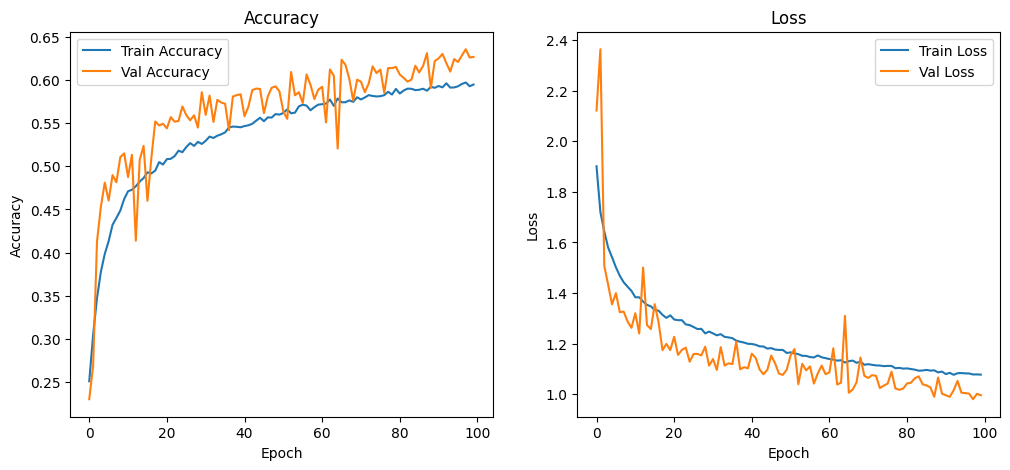

In [ ]:
import matplotlib.pyplot as plt
# Importa Matplotlib para crear gráficos y visualizar la evolución del entrenamiento.

# Final evaluation on the validation set
loss, accuracy = model.evaluate(X_val, y_val, verbose=1)
# Evalúa el modelo usando el conjunto de validación.
# Devuelve la pérdida (loss) y la precisión (accuracy).
# verbose=1 muestra la barra de progreso y los resultados.

print(f"Validation loss: {loss:.4f}")
print(f"Validation accuracy: {accuracy:.4f}")
# Imprime la pérdida y precisión en validación con 4 decimales.

# Plot training curves
plt.figure(figsize=(12, 5))
# Crea una figura amplia para dos subgráficos lado a lado.

plt.subplot(1, 2, 1)
# Primer subgráfico (fila 1, columna 2, posición 1): Precisión.

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# Grafica la precisión en entrenamiento y validación a lo largo de las épocas.

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Añade título, etiquetas y leyenda al gráfico.

plt.subplot(1, 2, 2)
# Segundo subgráfico (fila 1, columna 2, posición 2): Pérdida.

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
# Grafica la función de pérdida en entrenamiento y validación a lo largo de las épocas.

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Añade título, etiquetas y leyenda.

plt.show()
# Muestra ambos gráficos en pantalla.


In [ ]:
import numpy as np
# Importa NumPy para manejo de arreglos y generación de números aleatorios.

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
# Lista con las etiquetas de emociones correspondientes a las clases del modelo.

# Predict and display 5 random samples from validation set
S = 5  # Número de muestras aleatorias a mostrar.

for _ in range(S):
    idx = np.random.randint(0, X_val.shape[0])
    # Genera un índice aleatorio entre 0 y el tamaño del conjunto de validación.

    sample = X_val[idx:idx+1]
    # Obtiene la muestra de imagen (un solo ejemplo) con forma (1, 48, 48, 1) para predecir.

    pred = model.predict(sample)
    # Obtiene la predicción del modelo para esa muestra (vector de probabilidades para cada clase).

    label = emotion_labels[np.argmax(pred)]
    # Selecciona la etiqueta predicha con mayor probabilidad.

    true = emotion_labels[np.argmax(y_val[idx:idx+1])]
    # Obtiene la etiqueta verdadera (one-hot a índice) y la convierte a nombre.

    print(f"True: {true:>8} — Predicted: {label:>8}")
    # Imprime la etiqueta verdadera y la predicha alineadas a la derecha.


1/1 [==============================] - 0s 206ms/step
True:      Sad — Predicted: Surprise
1/1 [==============================] - 0s 13ms/step
True:  Neutral — Predicted:  Neutral
1/1 [==============================] - 0s 16ms/step
True:    Angry — Predicted:    Angry
1/1 [==============================] - 0s 14ms/step
True:    Happy — Predicted:    Happy
1/1 [==============================] - 0s 24ms/step
True: Surprise — Predicted: Surprise


Visualizar y comparar de forma cualitativa las predicciones del modelo frente a las emociones reales en un conjunto reducido de ejemplos del conjunto de validación. Para ello, se seleccionan aleatoriamente cinco imágenes, se predice su clase emocional usando el modelo entrenado, y se comparan estas predicciones con sus respectivas etiquetas verdaderas.

1/1 [==============================] - 0s 17ms/step


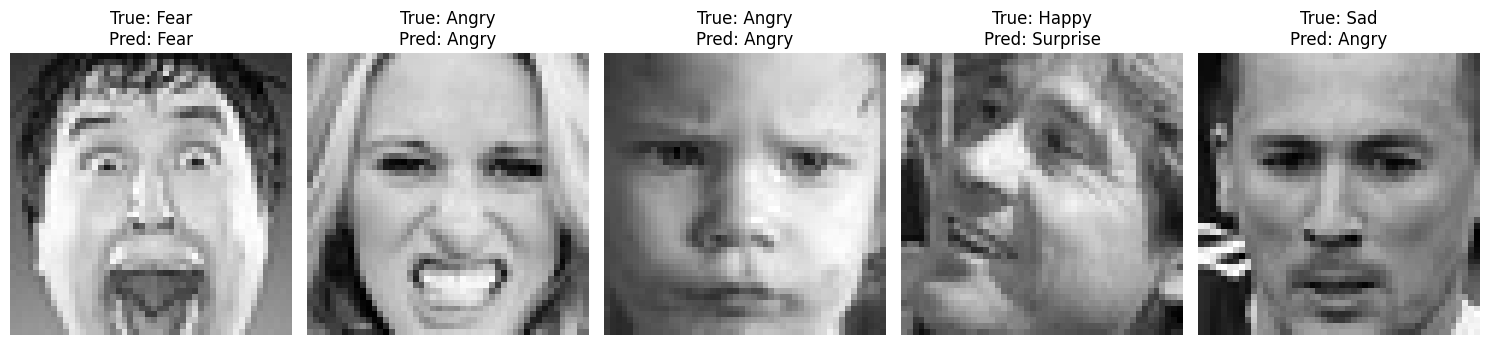

In [ ]:
# Ensure variable from previous steps
# If emotion_labels is not defined, set it to default labels
try:
    emotion_labels
except NameError:
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
# Verifica si la variable 'emotion_labels' ya existe.
# Si no existe (NameError), la define con la lista estándar de etiquetas.

# Select 5 random unique indices from the validation set
indices = np.random.choice(range(X_val.shape[0]), size=S, replace=False)
# Selecciona 5 índices únicos aleatorios (sin repetición) del conjunto de validación.

plt.figure(figsize=(15, 4))
# Crea una figura amplia para mostrar las imágenes en fila.

for i, idx in enumerate(indices):
    img = X_val[idx].squeeze()  # shape (48,48)
    # Extrae la imagen del conjunto de validación y elimina la dimensión del canal (48x48).

    pred = model.predict(X_val[idx:idx+1])
    # Obtiene la predicción del modelo para esta imagen.

    pred_label = emotion_labels[np.argmax(pred)]
    # Determina la etiqueta predicha (la con mayor probabilidad).

    true_label = emotion_labels[np.argmax(y_val[idx])]
    # Obtiene la etiqueta verdadera de la imagen.

    # Display the image with true and predicted labels
    plt.subplot(1, S, i+1)
    # Crea un subgráfico en la posición i+1 de una fila con S columnas.

    plt.imshow(img, cmap='gray')
    # Muestra la imagen en escala de grises.

    plt.title(f"True: {true_label}\nPred: {pred_label}")
    # Añade título con la etiqueta verdadera y la predicha, separados por salto de línea.

    plt.axis('off')
    # Oculta los ejes para mejor visualización.

plt.tight_layout()
# Ajusta el layout para evitar solapamiento de subgráficos.

plt.show()
# Muestra la figura completa con las imágenes y etiquetas.


## 13.Conclusiones

- Logros obtenidos: Destacando la implementación exitosa del modelo CNN, precisión del 62.65%, sistema en tiempo real y experiencia interactiva
- Desbalance del dataset, variabilidad en condiciones reales, similitud entre emociones
- Importancia del preprocesamiento, arquitectura balanceada, evaluación continua
- Interfaces intuitivas, monitoreo emocional, análisis de satisfacción
- Mejoras con datasets más grandes, transfer learning, análisis temporal

## 14.Blibliografías

- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.  
- Chollet, F. (2018). Deep Learning with Python. Manning Publications.  
- Simonyan, K., & Zisserman, A. (2014). Very Deep Convolutional Networks for Large-Scale Image Recognition. arXiv:1409.1556.  
- FER2013 Dataset. Kaggle. https://www.kaggle.com/datasets/msambare/fer2013  
- OpenCV Documentation. https://docs.opencv.org/  
- TensorFlow/Keras Documentation. https://www.tensorflow.org/api_docs  
- Hugging Face Datasets Documentation. https://huggingface.co/docs/datasets  
- O. M. Parkhi, A. Vedaldi, A. Zisserman, "Deep Face Recognition", British Machine Vision Conference, 2015.